# Visualizing intermediate activation in Convolutional Neural Networks with Keras

In [48]:
import glob
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

###### DISPLAYING DATA

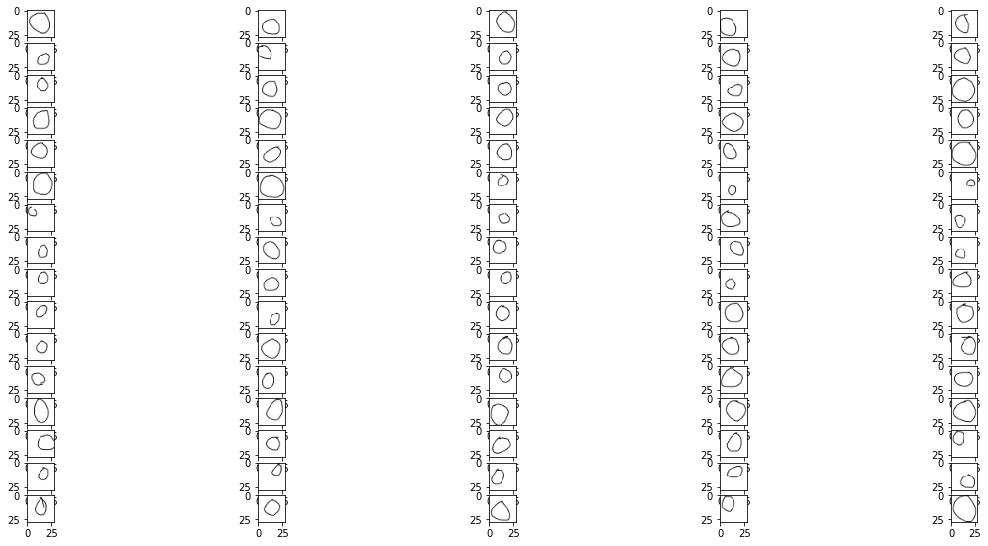

In [24]:
images = []
for img_path in glob.glob('E:/DATA SETS/shapes/training_set/circles/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

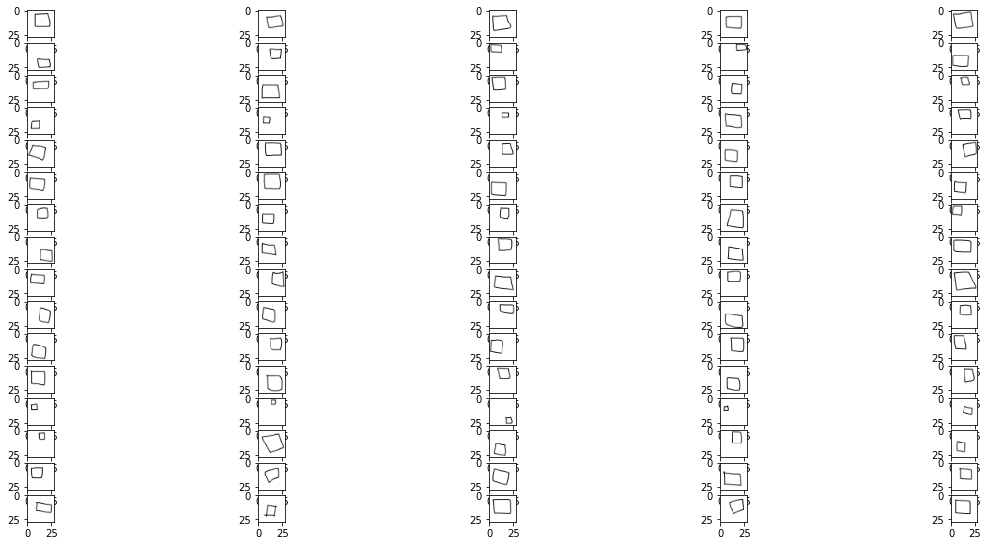

In [25]:
images = []
for img_path in glob.glob('E:/DATA SETS/shapes/training_set/squares/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

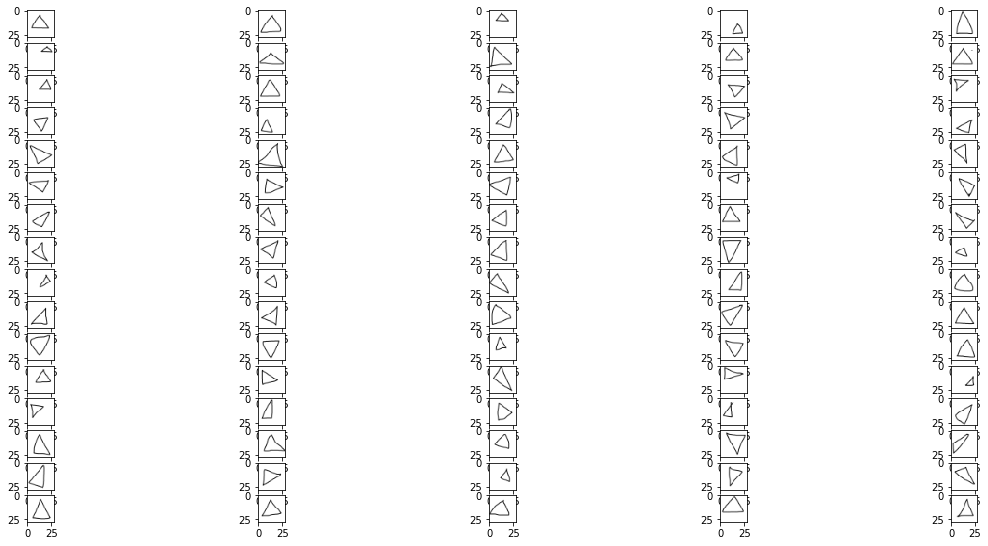

In [26]:
images = []
for img_path in glob.glob('E:/DATA SETS/shapes/training_set/triangles/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

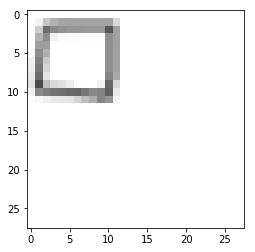

(28, 28, 3)


In [27]:
img = cv2.imread('E:/DATA SETS/shapes/training_set/squares/drawing(40).png')
plt.imshow(img)
plt.show()
print(img.shape)

###### MAKING THE MODEL

In [28]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [29]:
# Compiling the CNN
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

###### Making DATA GENERATORS

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set  = train_datagen.flow_from_directory(
    directory=r"E:/DATA SETS/shapes/training_set/",
    target_size=(28, 28),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    directory=r"E:/DATA SETS/shapes/test_set/",
    target_size=(28, 28),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


###### Save Only The Weights When Accuracy was maximum

In [34]:
checkpointer = ModelCheckpoint(filepath="E:/DATA SETS/model1/best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

###### Running the Model

In [35]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 20,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 12s 116ms/step - loss: 1.0787 - acc: 0.3803 - val_loss: 0.9937 - val_acc: 0.5187

Epoch 00001: val_acc improved from -inf to 0.51867, saving model to E:/DATA SETS/model1/best_weights.hdf5
Epoch 2/20
100/100 [==============================] - 12s 116ms/step - loss: 0.6090 - acc: 0.7384 - val_loss: 0.3980 - val_acc: 0.8160

Epoch 00002: val_acc improved from 0.51867 to 0.81600, saving model to E:/DATA SETS/model1/best_weights.hdf5
Epoch 3/20
100/100 [==============================] - 12s 116ms/step - loss: 0.4029 - acc: 0.8391 - val_loss: 0.2810 - val_acc: 0.9013

Epoch 00003: val_acc improved from 0.81600 to 0.90133, saving model to E:/DATA SETS/model1/best_weights.hdf5
Epoch 4/20
100/100 [==============================] - 12s 117ms/step - loss: 0.2900 - acc: 0.8919 - val_loss: 0.1240 - val_acc: 0.9667

Epoch 00004: val_acc improved from 0.90133 to 0.96667, saving model to E:/DATA SETS/model1/best_weights.hdf5
Epoch 5/20
100/100 [===

###### LOADING the best weights and saving the model

In [40]:
classifier.load_weights('E:/DATA SETS/model1/best_weights.hdf5')
classifier.save('E:/DATA SETS/model1/shapes_cnn.h5')

###### SHOWING STATS

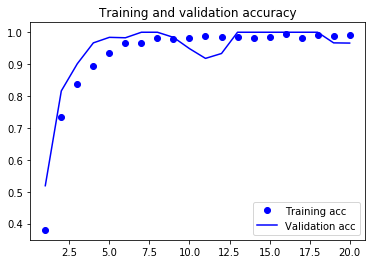

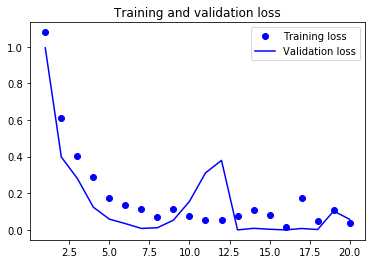

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

###### PREDICTING ON NEW IMAGES

Predicted class is: [0]


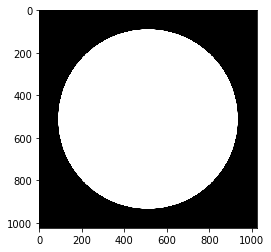

In [58]:
img_path = 'E:/DATA SETS/model1/test_circle.png'
img = cv2.imread(img_path)
plt.imshow(img)

img = cv2.resize(img,(28,28))
img = np.reshape(img,[1,28,28,3])

classes = classifier.predict_classes(img)

print("Predicted class is:",classes)

Predicted class is: [2]


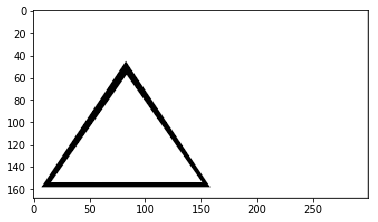

In [57]:
img_path = 'E:/DATA SETS/model1/test_triangle.png'
img = cv2.imread(img_path)
plt.imshow(img)

img = cv2.resize(img,(28,28))
img = np.reshape(img,[1,28,28,3])

classes = classifier.predict_classes(img)

print("Predicted class is:",classes)